In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
diabetes = pd.read_csv("/content/diabetes.csv")

In [ ]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Handling Missing Values

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [ ]:
diabetes = diabetes.replace("?", np.NaN, )

In [ ]:
diabetes.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [ ]:
diabetes["race"]

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object

In [ ]:
#Replacing missing race with previous value – Forward fill

diabetes = diabetes.where(~diabetes.race.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [ ]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
count = (diabetes["race"] == "?").sum()

In [ ]:
count

0

In [ ]:
diabetes['weight'] = diabetes['weight'].fillna(diabetes['weight'].mode()[0])

In [ ]:
diabetes = diabetes.where(~diabetes.payer_code.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [ ]:
diabetes = diabetes.where(~diabetes.medical_specialty.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [ ]:
diabetes = diabetes.where(~diabetes.diag_1.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes = diabetes.where(~diabetes.diag_2.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes = diabetes.where(~diabetes.diag_3.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                81320 non-null   object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

EDA

In [ ]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),[75-100),6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),[75-100),1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),[75-100),1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),[75-100),1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),[75-100),1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df = diabetes.groupby(["race"]).size().sort_values(ascending = False)

In [ ]:
df

race
Caucasian          77840
AfricanAmerican    19622
Hispanic            2094
Other               1542
Asian                668
dtype: int64

In [ ]:
Caucasian = diabetes.loc[diabetes["race"]=="Caucasian"].count()[0]
Afro_American = diabetes.loc[diabetes["race"]=="AfricanAmerican"].count()[0]
Hispanic = diabetes.loc[diabetes["race"]=="Hispanic"].count()[0]
Other = diabetes.loc[diabetes["race"]=="Other"].count()[0]
Asian = diabetes.loc[diabetes["race"]=="Asian"].count()[0]

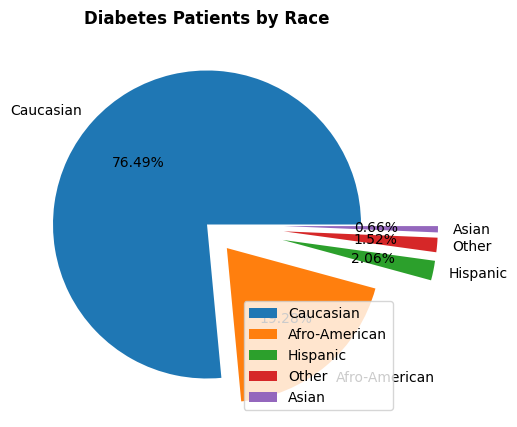

In [ ]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Caucasian", "Afro-American", "Hispanic", "Other", "Asian"]
explode = [0,0.2,0.5,0.5,0.5]

plt.pie([Caucasian, Afro_American, Hispanic, Other, Asian], labels = labels, autopct = "%0.2f%%", explode = explode)
plt.title("Diabetes Patients by Race", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

Caucasian are largest group of diabetic patients diagnosed, followed by Afro-American.

In [ ]:
df = diabetes.groupby(["gender"]).size().sort_values(ascending = False)

In [ ]:
df

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

In [ ]:
Male = diabetes.loc[diabetes["gender"]=="Male"].count()[0]
Female = diabetes.loc[diabetes["gender"]=="Female"].count()[0]
Other = diabetes.loc[diabetes["gender"]=="Other"].count()[0]

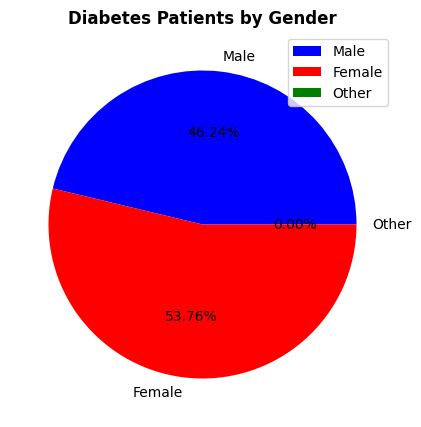

In [ ]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Male", "Female", "Other"]
colors = ["Blue", "Red", "Green"]

plt.pie([Male, Female, Other], colors = colors, labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Gender", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

Females are marginally more in number than Males. Others are negligible.

In [ ]:
df = diabetes.groupby(["age"]).size()

In [ ]:
df

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64

In [ ]:
df1 = pd.DataFrame(df)

In [ ]:
df1.columns = ["Count"]

In [ ]:
df1

,Count
age,
[0-10),161
[10-20),691
[20-30),1657
[30-40),3775
[40-50),9685
[50-60),17256
[60-70),22483
[70-80),26068
[80-90),17197


In [ ]:
df1["pct"] = (df1["Count"]/(df1["Count"].sum()))*100

In [ ]:
df1["pct"]

age
[0-10)       0.158206
[10-20)      0.679009
[20-30)      1.628245
[30-40)      3.709490
[40-50)      9.516931
[50-60)     16.956547
[60-70)     22.092840
[70-80)     25.615628
[80-90)     16.898571
[90-100)     2.744532
Name: pct, dtype: float64

In [ ]:
df1

,Count,pct
age,,
[0-10),161,0.158206
[10-20),691,0.679009
[20-30),1657,1.628245
[30-40),3775,3.709490
[40-50),9685,9.516931
[50-60),17256,16.956547
[60-70),22483,22.092840
[70-80),26068,25.615628
[80-90),17197,16.898571


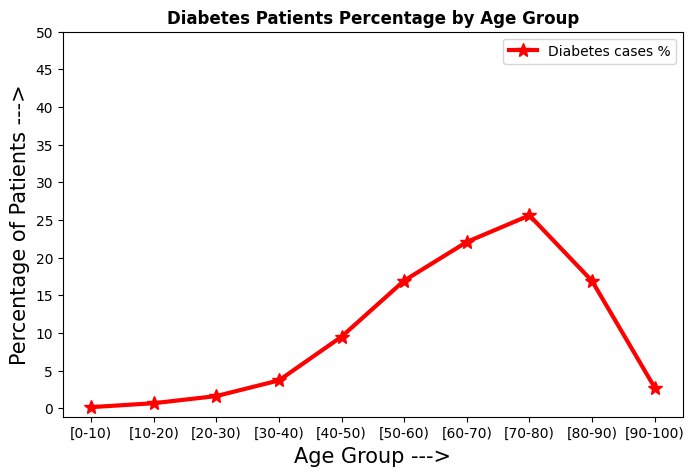

In [ ]:
plt.figure(figsize = [8,5], dpi = 100)

plt.xlabel("Age Group --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})  # to label the axis x and y
plt.ylabel("Percentage of Patients --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.plot(df1["pct"], label = "Diabetes cases %", color = "red", linewidth = 3, marker = "*", markersize = 10)
plt.title("Diabetes Patients Percentage by Age Group", fontdict = {"fontweight": "bold"})

plt.yticks([0,5,10,15,20,25,30,35,40,45,50])

plt.legend()
plt.show()

Patients in age group [70-80) forms largest percentage of patients i.e. around 25%. While [0-10} form smallest percentage.

In [ ]:
t_in_h = pd.DataFrame(diabetes["time_in_hospital"].groupby(diabetes["age"]).mean())

In [ ]:
t_in_h

,time_in_hospital
age,
[0-10),2.546584
[10-20),3.191027
[20-30),3.564876
[30-40),3.799735
[40-50),4.039649
[50-60),4.125753
[60-70),4.382244
[70-80),4.590878
[80-90),4.808629


In [ ]:
l1 = list(t_in_h.index.values)
l2 = list(t_in_h["time_in_hospital"])

In [ ]:
l1

['[0-10)',
 '[10-20)',
 '[20-30)',
 '[30-40)',
 '[40-50)',
 '[50-60)',
 '[60-70)',
 '[70-80)',
 '[80-90)',
 '[90-100)']

In [ ]:
l2

[2.546583850931677,
 3.191027496382055,
 3.5648762824381413,
 3.7997350993377483,
 4.039648941662365,
 4.125753361149745,
 4.382244362407152,
 4.590877704465245,
 4.808629412106763,
 4.755818116720373]

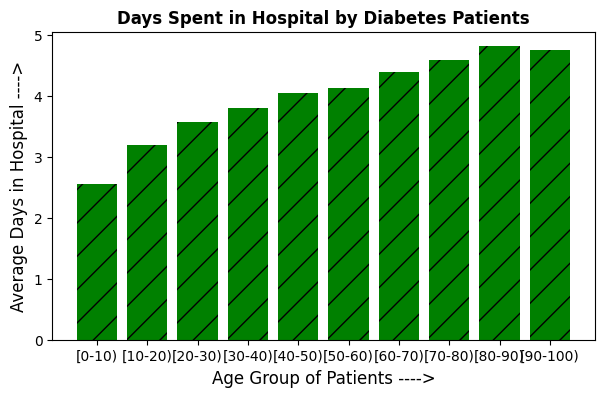

In [ ]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "green", hatch = "/")
plt.ylabel("Average Days in Hospital ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})

plt.title("Days Spent in Hospital by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

Patients in age group of [80-90) spend high number of day in hospital on an average.

In [ ]:
num_lab = pd.DataFrame(diabetes["num_lab_procedures"].groupby(diabetes["age"]).mean())
l1 = list(num_lab.index.values)
l2 = list(num_lab["num_lab_procedures"])

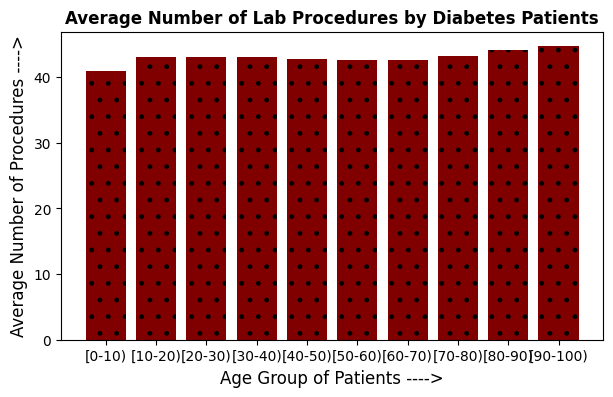

In [ ]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "maroon", hatch = ".")
plt.ylabel("Average Number of Procedures ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})

plt.title("Average Number of Lab Procedures by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

Average number of Lab Procedures are almost similar for all age groups with slight increase above age of 70

In [ ]:
num_diag = pd.DataFrame(diabetes["number_diagnoses"].groupby(diabetes["age"]).mean())
l1 = list(num_diag.index.values)
l2 = list(num_diag["number_diagnoses"])

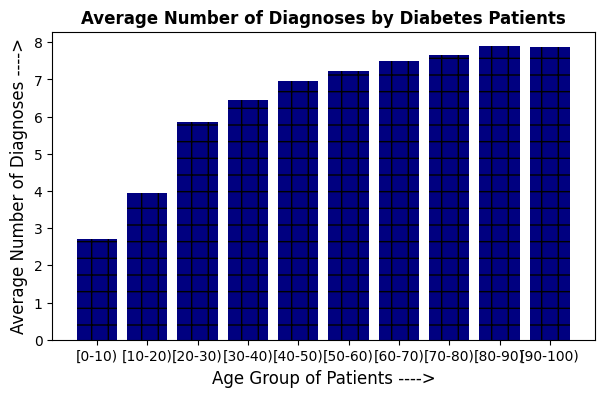

In [ ]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "navy", hatch = "+")
plt.ylabel("Average Number of Diagnoses ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})

plt.title("Average Number of Diagnoses by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

Average number of Diagnoses increase significantly during early age but becomes steady between 7-8 procedures after 60 year of age.

In [ ]:
df = diabetes.groupby(["insulin"]).size().sort_values(ascending = False)

In [ ]:
df

insulin
No        47383
Steady    30849
Down      12218
Up        11316
dtype: int64

In [ ]:
Steady = diabetes.loc[diabetes["insulin"]=="Steady"].count()[0]
Down = diabetes.loc[diabetes["insulin"]=="Down"].count()[0]
Up = diabetes.loc[diabetes["insulin"]=="Up"].count()[0]

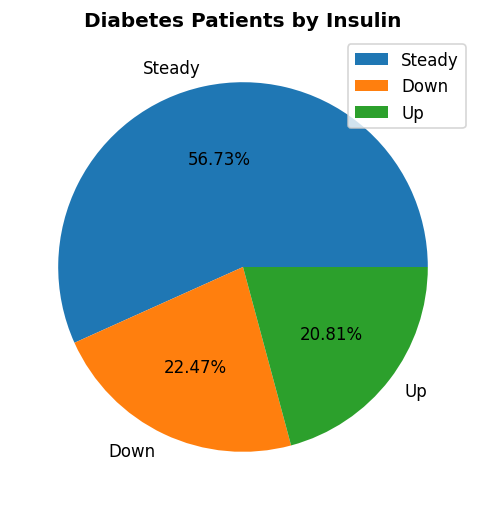

In [ ]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Steady", "Down", "Up"]

plt.pie([Steady, Down, Up], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Insulin", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

Majority of patients have insulin level steady

In [ ]:
df = diabetes.groupby(["diabetesMed"]).size().sort_values(ascending = False)

In [ ]:
df

diabetesMed
Yes    78363
No     23403
dtype: int64

In [ ]:
Yes = diabetes.loc[diabetes["diabetesMed"]=="Yes"].count()[0]
No = diabetes.loc[diabetes["diabetesMed"]=="No"].count()[0]

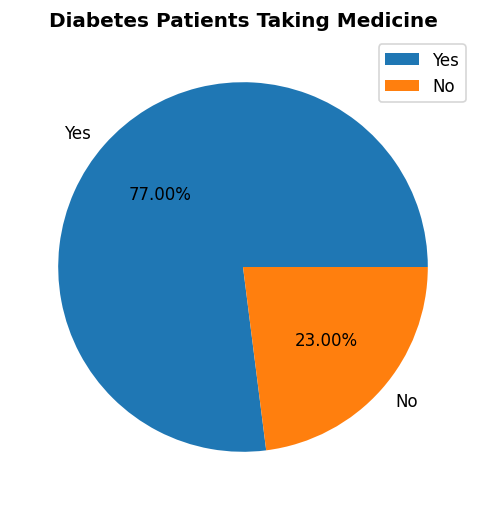

In [ ]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Yes", "No"]

plt.pie([Yes, No], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients Taking Medicine", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

77% of patients are taking their medicines while 23% are not taking medicine.